# Linear Regression on Hardware Data
This notebook demonstrates how to generate synthetic hardware data and apply linear regression to predict power consumption based on multiple hardware metrics.

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/giridhar276/genai/refs/heads/main/ml/linear_regression/hardware_info.csv')

## Split the Data
We will split the data into training and testing sets.

In [3]:

# Split the data into training and testing sets
X = data[['CPU_Usage', 'RAM_Usage', 'Disk_IO', 'Network_In', 'Network_Out', 'Temperature', 'Fan_Speed', 'Voltage']]
y = data['Power_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 8), (200, 8), (800,), (200,))

## Train the Linear Regression Model
We will create and train a linear regression model using the training data.

In [4]:

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')


Intercept: 30.95872420478048
Coefficients: [1.4914861  0.50889614 0.00999507 0.01978859 0.0195227  0.48699029
 0.01013422 9.66216749]


## Make Predictions
We will use the trained model to make predictions on the test data.

In [5]:

# Make predictions
y_pred = model.predict(X_test)

# Display the first few predictions
y_pred[:5]


array([212.50365706, 228.21066584, 241.35037942, 191.92197536,
       232.80909906])

## Plot the Results
We will plot the actual vs predicted power consumption values.

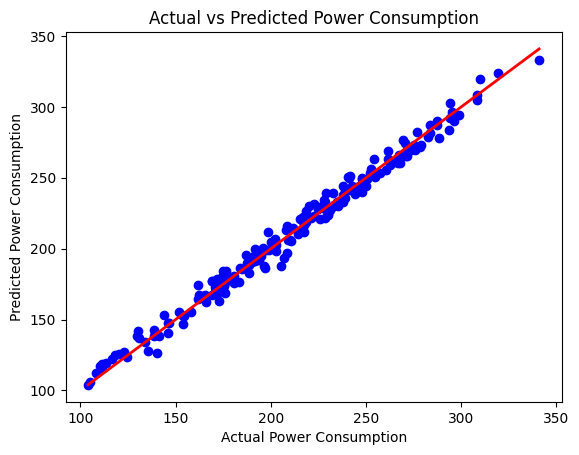

In [6]:

# Plot the results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.show()


## Evaluate the Model
We will evaluate the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), R-squared (R²) score, and Adjusted R-squared.

In [7]:

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}%')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')


Mean Absolute Error: 4.403836614140025
Mean Squared Error: 30.194636637892273
Root Mean Squared Error: 5.494964662114969
Mean Absolute Percentage Error: 2.2300979357798445%
R-squared: 0.9879578094650721
Adjusted R-squared: 0.9874534245212008


## Check Assumptions of Linear Regression
We will check the assumptions of linear regression to validate the model.

### Linearity
The relationship between the independent and dependent variables should be linear.

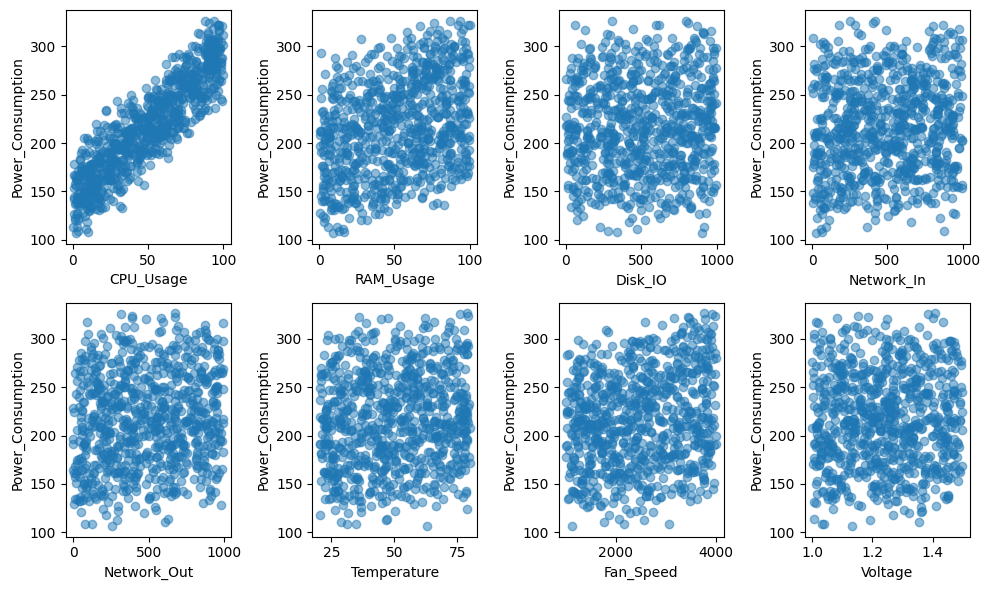

In [8]:

# Linearity
plt.figure(figsize=(10, 6))
for i, col in enumerate(X_train.columns, 1):
    plt.subplot(2, 4, i)
    plt.scatter(X_train[col], y_train, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Power_Consumption')
plt.tight_layout()
plt.show()


### Independence
The residuals should be independent (no patterns).

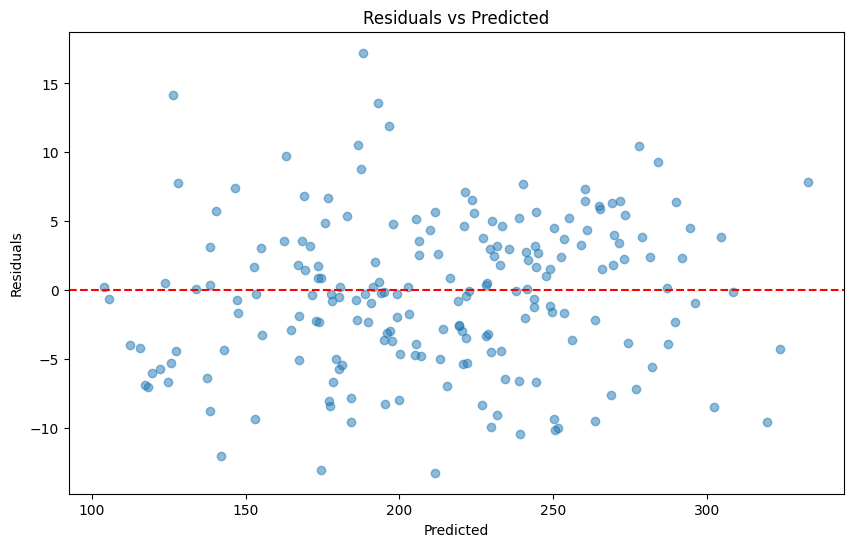

In [9]:

# Independence
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


### Homoscedasticity
The residuals should have constant variance.

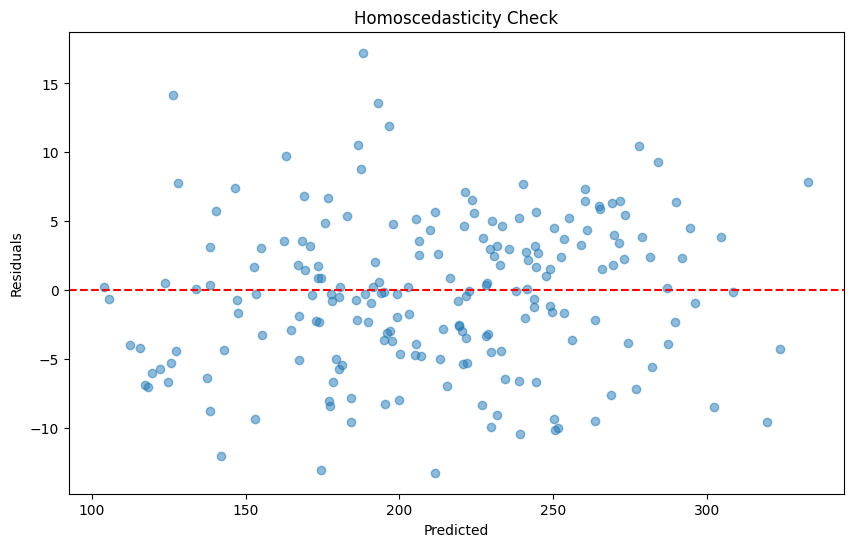

In [10]:

# Homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()


### Normality of Residuals
The residuals should be normally distributed.

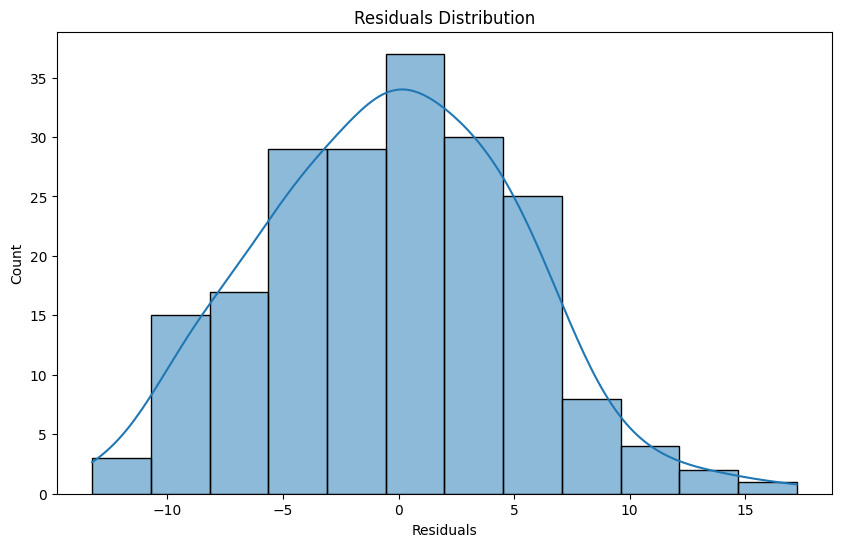

In [11]:

# Normality of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()




## Variance Inflation Factor (VIF)
We will calculate VIF to check for multicollinearity among the independent variables.

In [12]:

# Variance Inflation Factor (VIF) - detect severity of multicollinearity
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


       feature        VIF
0    CPU_Usage   3.715728
1    RAM_Usage   4.014065
2      Disk_IO   3.821451
3   Network_In   3.805086
4  Network_Out   3.865178
5  Temperature   8.643571
6    Fan_Speed   8.684121
7      Voltage  23.046159


## Heatmap
We will plot a heatmap to visualize the correlation between features.

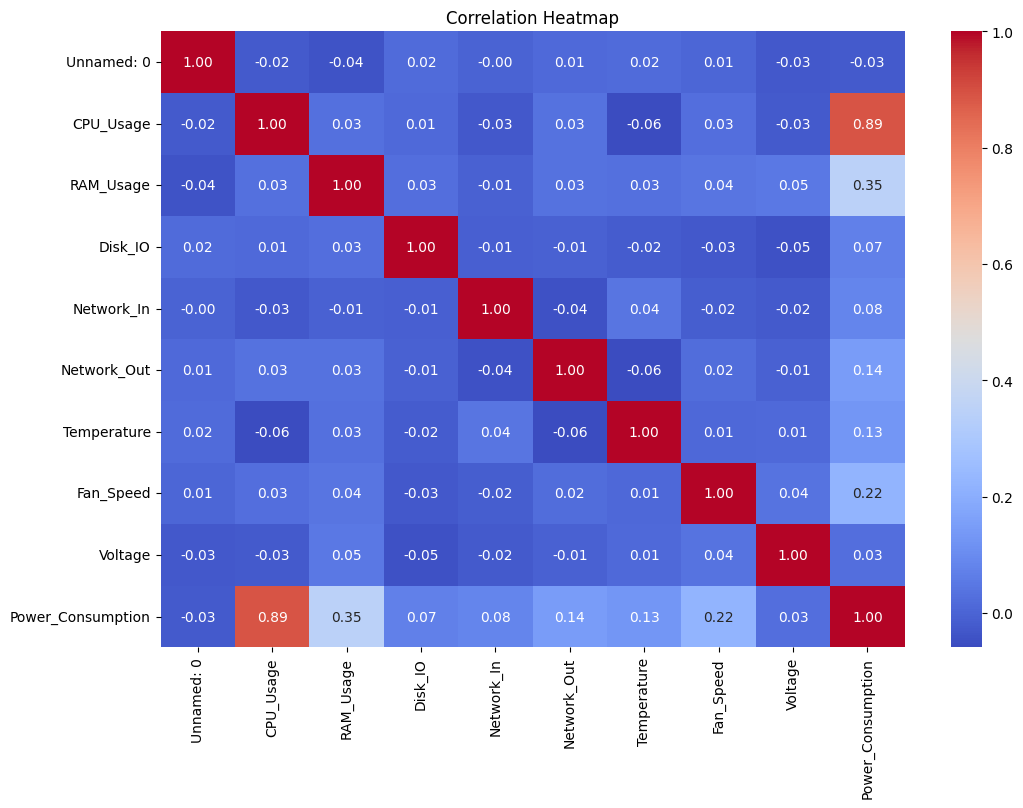

In [13]:

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Correlation Matrix
We will display the correlation matrix.

In [14]:

# Correlation Matrix
corr_matrix = data.corr()
print(corr_matrix)


                   Unnamed: 0  CPU_Usage  RAM_Usage   Disk_IO  Network_In  \
Unnamed: 0           1.000000  -0.024495  -0.038855  0.015767   -0.003548   
CPU_Usage           -0.024495   1.000000   0.029310  0.014518   -0.029424   
RAM_Usage           -0.038855   0.029310   1.000000  0.027262   -0.005791   
Disk_IO              0.015767   0.014518   0.027262  1.000000   -0.013560   
Network_In          -0.003548  -0.029424  -0.005791 -0.013560    1.000000   
Network_Out          0.013645   0.034785   0.032911 -0.008858   -0.044812   
Temperature          0.016340  -0.059440   0.029994 -0.020353    0.039959   
Fan_Speed            0.006027   0.027269   0.042327 -0.028299   -0.017133   
Voltage             -0.028854  -0.025491   0.049960 -0.046775   -0.022849   
Power_Consumption   -0.025823   0.890753   0.348976  0.071248    0.081623   

                   Network_Out  Temperature  Fan_Speed   Voltage  \
Unnamed: 0            0.013645     0.016340   0.006027 -0.028854   
CPU_Usage       

In [ ]:
#creating another Linear regression model by reducing fe columns which can be corelated

In [15]:
X1 = data[['RAM_Usage', 'Disk_IO', 'Network_In', 'Network_Out', 'Temperature', 'Fan_Speed', 'Voltage']]
y1 = data['Power_Consumption']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((800, 7), (200, 7), (800,), (200,))

In [16]:
# Create and train the model
model = LinearRegression()
model.fit(X_train1, y_train1)

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: 117.34458959724678
Coefficients: [0.55795529 0.00822901 0.01934963 0.02218443 0.35510922 0.01045849
 2.04143435]


In [18]:

# Make predictions
y_pred1 = model.predict(X_test1)

# Display the first few predictions
y_pred1[:5]

array([231.53334304, 180.56279949, 244.53992296, 217.46522417,
       164.29198201])

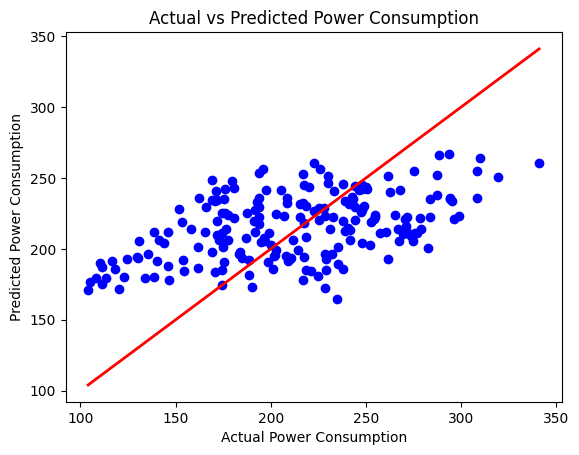

In [19]:
# Plot the results
plt.scatter(y_test1, y_pred1, color='blue')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], color='red', linewidth=2)
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.show()